Fit Support Vector Machine model using Linear Kernel

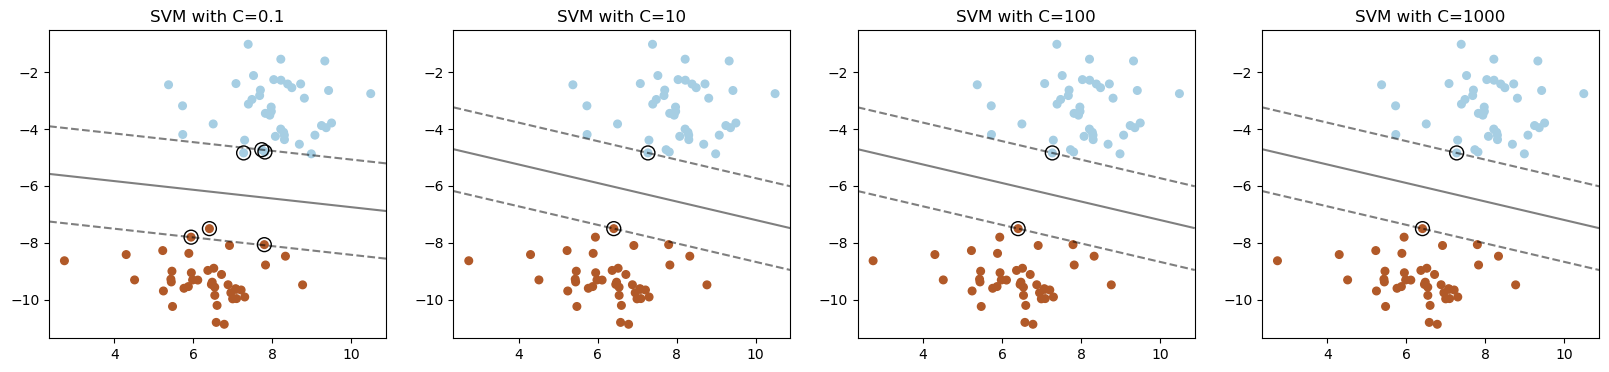

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

def plot_dec_func(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Grid creation
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax

# Create a simple dataset
X, y = make_blobs(n_samples=80, centers=2, random_state=6)

# Train SVMs with different C values
C_values = [0.1, 10, 100, 1000]
models = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, C in zip(models, axes, C_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_dec_func(model, ax)
    
    ax.set_title(f'SVM with C={C}')

plt.show()

Fit Support Vector Machine model using RBF kernel

In [12]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
import numpy as np


# Create a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)


# Create an SVM model with an RBF kernel
svm_model = svm.SVC(kernel='rbf')

# Define a range of gamma values to search
param_grid = {'gamma': np.logspace(-3, 3, 7)}  # You can adjust the range as needed

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

best_gamma = grid_search.best_params_['gamma']
best_svm_model = grid_search.best_estimator_

print(best_gamma)

0.001
